<a href="https://colab.research.google.com/github/MontesRamos/APIRESTDemo1/blob/master/BI_PreprocesamientoPregunta4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

In [8]:
datos = pd.read_csv('/content/gdrive/My Drive/colabdatasets/BI_PreprocesamientoPregunta1/ejercicio4s_IntNeg_6.csv', sep= ';', index_col=False , encoding='latin-1') 
datos

,ID,Casado,Tienes hijos,nro dpntes,edad,trabaja,tipo vivenda,hace deporte,ofrece seguro
0,701,no,si,1,25,si,propia,1 vez sem,"si, con condiciones"
1,305,no,no,0,29,no,familiar,ninguna,no
2,203,no,si,1,34,si,propia,ninguna,si
3,304,si,si,3,43,si,propia,1 vez sem,si
4,102,si,no,1,51,si,propia,2 veces sem,"si, con condiciones"
5,406,si,si,2,52,si,arrienda,ninguna,no
6,507,si,si,4,43,si,arrienda,3 veces o mas,si
7,108,no,no,0,33,no,familiar,ninguna,no
8,409,si,si,1,27,si,propia,2 veces sem,si
9,180,si,si,1,28,si,propia,3 veces o mas,"si, con condiciones"


In [9]:
datos.head()

,ID,Casado,Tienes hijos,nro dpntes,edad,trabaja,tipo vivenda,hace deporte,ofrece seguro
0,701,no,si,1,25,si,propia,1 vez sem,"si, con condiciones"
1,305,no,no,0,29,no,familiar,ninguna,no
2,203,no,si,1,34,si,propia,ninguna,si
3,304,si,si,3,43,si,propia,1 vez sem,si
4,102,si,no,1,51,si,propia,2 veces sem,"si, con condiciones"


In [21]:
data['ofrece seguro'].str.lstrip() 
data['ofrece seguro'].str.rstrip() 

datos['Casado'] = datos['Casado'].replace(['no'],0)
datos['Casado'] = datos['Casado'].replace(['si'],1)

datos['Tienes hijos'] = datos['Tienes hijos'].replace(['no'],0)
datos['Tienes hijos'] = datos['Tienes hijos'].replace(['si'],1)

datos['trabaja'] = datos['trabaja'].replace(['no'],0)
datos['trabaja'] = datos['trabaja'].replace(['si'],1)

datos['tipo vivenda'] = datos['tipo vivenda'].replace(['arrienda'],0)
datos['tipo vivenda'] = datos['tipo vivenda'].replace(['familiar'],1)
datos['tipo vivenda'] = datos['tipo vivenda'].replace(['propia'],2)

datos['hace deporte'] = datos['hace deporte'].replace(['1 vez sem'],0)
datos['hace deporte'] = datos['hace deporte'].replace(['2 veces sem'],1)
datos['hace deporte'] = datos['hace deporte'].replace(['3 veces o mas'],2)
datos['hace deporte'] = datos['hace deporte'].replace(['ninguna'],3)

datos['ofrece seguro'] = datos['ofrece seguro'].replace(['no'],0)
datos['ofrece seguro'] = datos['ofrece seguro'].replace(['si'],1)
datos['ofrece seguro'] = datos['ofrece seguro'].replace(['si '],1)
datos['ofrece seguro'] = datos['ofrece seguro'].replace(['si, con condiciones'],2)

##Eliminamos la columna ID al no ser relevante para la prediccion
datos = datos.drop('ID', 1)

datos

,Casado,Tienes hijos,nro dpntes,edad,trabaja,tipo vivenda,hace deporte,ofrece seguro
0,0,1,1,25,1,2,0,2
1,0,0,0,29,0,1,3,0
2,0,1,1,34,1,2,3,1
3,1,1,3,43,1,2,0,1
4,1,0,1,51,1,2,1,2
5,1,1,2,52,1,0,3,0
6,1,1,4,43,1,0,2,1
7,0,0,0,33,0,1,3,0
8,1,1,1,27,1,2,1,1
9,1,1,1,28,1,2,2,2


In [22]:
print(datos.groupby('ofrece seguro').size())

ofrece seguro
0     8
1    10
2     7
dtype: int64


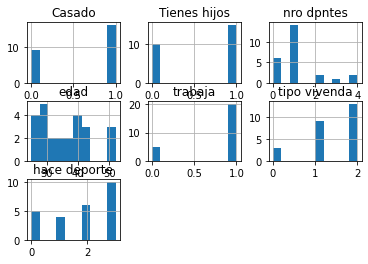

In [24]:
datos.drop(['ofrece seguro'],1).hist()
plt.show()

In [50]:
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.model_selection import train_test_split
%matplotlib inline

In [140]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

labels = ['True Neg','False Pos','False Neg','True Pos']
categories = ['Zero: No', 'One: Si','Two: Sic'] 
def make_confusion_matrix(cf,
                          group_names=labels,
                          categories=categories,
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [221]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)
y_true = y_test

X = np.array(datos.drop(['ofrece seguro'],1))
y = np.array(datos['ofrece seguro'])
#test_vals  = list(map(int,y_test.tolist()))


In [218]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from itertools import cycle

# Binarize the output


def printROC(y_test, y_score,y):
  y = label_binarize(y, classes=[0, 1, 2])
  n_classes = y.shape[1]
  lw = 1
  fpr = dict()
  tpr = dict()
  roc_auc = dict()
  for i in range(n_classes):
      fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
      roc_auc[i] = auc(fpr[i], tpr[i])
  colors = cycle(['blue', 'red', 'green'])
  for i, color in zip(range(n_classes), colors):
      plt.plot(fpr[i], tpr[i], color=color, lw=lw,
              label='ROC curve of class {0} (area = {1:0.2f})'
              ''.format(i, roc_auc[i]))

  plt.plot([0, 1], [0, 1], 'k--', lw=lw)
  plt.xlim([-0.05, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('Ratio falso positivo')
  plt.ylabel('Ratio verdadero positivo')
  plt.title('Curva ROC')
  plt.legend(loc="lower right")
  plt.show()

**Regresion logistica sin KFOLD**

ValueError: ignored

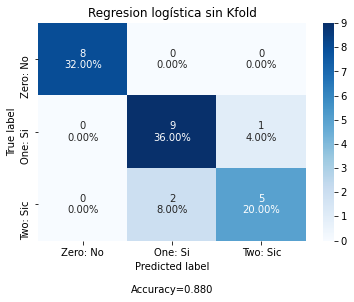

In [227]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import roc_curve, roc_auc_score

model = LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000).fit(X, y)
predictions = model.predict(X)
cf_matrix_regresionLogisticaSinKFold = confusion_matrix(y, predictions)
make_confusion_matrix(cf_matrix, title='Regresion logística sin Kfold')

#classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000))
#y_score = classifier.fit(X, y).predict_proba(X_validation)

classifier = OneVsRestClassifier(LogisticRegression(solver='lbfgs',class_weight='balanced', max_iter=10000))
y_score = classifier.fit(X_train, Y_train).predict_proba(X_validation)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(X_validation[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=lw,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=lw)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Ratio falso positivo')
plt.ylabel('Ratio verdadero positivo')
plt.title('Curva ROC')
plt.legend(loc="lower right")
plt.show()
#printROC(Y_validation, y_score, y)

**Regresion logistica con KFOLD**

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


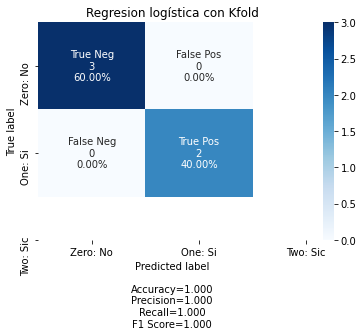

In [192]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
regresionLogisticaConKFold = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
predictions = model.predict(X_validation)

cf_matrix_regresionLogisticaConKFold = confusion_matrix(Y_validation, predictions)
make_confusion_matrix(cf_matrix_regresionLogisticaConKFold, title='Regresion logística con Kfold')